In [0]:
#!unzip air-pollution-in-seoul.zip

In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.externals import joblib 
% matplotlib inline
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/Dataset/Measurement_summary.csv')
data.head(10)

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
5,2017-01-01 05:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.046,0.002,1.1,70.0,61.0
6,2017-01-01 06:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.049,0.002,1.1,66.0,57.0
7,2017-01-01 07:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.045,0.002,1.0,71.0,60.0
8,2017-01-01 08:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.047,0.002,1.1,72.0,60.0
9,2017-01-01 09:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.047,0.002,1.1,74.0,63.0


In [4]:
# Retriving data for station code 101 for O3
data_101=data[(data['Station code']==101) & (data['O3']>0)]
print(len(data_101))
print(data_101.head(10))

25856
   Measurement date  Station code  ...  PM10  PM2.5
0  2017-01-01 00:00           101  ...  73.0   57.0
1  2017-01-01 01:00           101  ...  71.0   59.0
2  2017-01-01 02:00           101  ...  70.0   59.0
3  2017-01-01 03:00           101  ...  70.0   58.0
4  2017-01-01 04:00           101  ...  69.0   61.0
5  2017-01-01 05:00           101  ...  70.0   61.0
6  2017-01-01 06:00           101  ...  66.0   57.0
7  2017-01-01 07:00           101  ...  71.0   60.0
8  2017-01-01 08:00           101  ...  72.0   60.0
9  2017-01-01 09:00           101  ...  74.0   63.0

[10 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


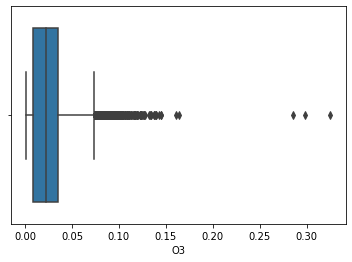

In [5]:
import seaborn as sns
sns.boxplot(data_101['O3'])

25552


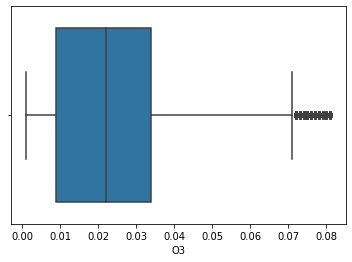

In [6]:
from scipy import stats
z = np.abs(stats.zscore(data_101['O3']))
threshold = 3
#print(len(np.where(z > 3)))
data_101_Rout = data_101[(z < 3)]
print(len(data_101_Rout))
sns.boxplot(data_101_Rout['O3'])

In [7]:
df=data_101_Rout['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)

(25552, 1)


In [8]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))


[0.001] [0.081]
25552
0.0 1.0


In [9]:
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])


25547 [0.0125, 0.0125, 0.0125, 0.0125, 0.0125]


In [10]:
matrix=np.matrix(y)
print(matrix.shape)
new_data = pd.DataFrame(matrix,columns=['x1','x2','x3','x4','y'])
new_data.head(10)


(25547, 5)


,x1,x2,x3,x4,y
0,0.0125,0.0125,0.0125,0.0125,0.0125
1,0.0125,0.0125,0.0125,0.0125,0.0125
2,0.0125,0.0125,0.0125,0.0125,0.0125
3,0.0125,0.0125,0.0125,0.0125,0.0125
4,0.0125,0.0125,0.0125,0.0125,0.0125
5,0.0125,0.0125,0.0125,0.0125,0.0125
6,0.0125,0.0125,0.0125,0.0125,0.0375
7,0.0125,0.0125,0.0125,0.0375,0.0500
8,0.0125,0.0125,0.0375,0.0500,0.0500
9,0.0125,0.0375,0.0500,0.0500,0.0750


In [11]:
print(matrix[:,4])

[[0.0125]
 [0.0125]
 [0.0125]
 ...
 [0.1625]
 [0.25  ]
 [0.1625]]


In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor_Rout.pkl')
from google.colab import files
files.download('linear_regressor_Rout.pkl')
print(prediction.shape,prediction[0:5])

(8431, 1) [[0.41319692]
 [0.24188727]
 [0.4738416 ]
 [0.0404949 ]
 [0.14188873]]


In [13]:
print(model.score(X_train,y_train))
print(model.intercept_)
print(model.coef_)

0.8869024510049224
[0.0293097]
[[-0.0514173  -0.03843188 -0.20617408  1.19083916]]


In [14]:
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

mean squared eror :  0.005631166001895172
absolute mean error :  0.050397010938942464
0.8814567992130252


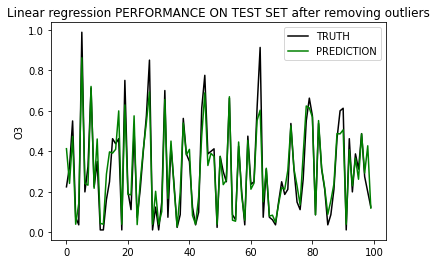

In [15]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET after removing outliers')
plt.ylabel('O3')
plt.legend()
plt.show()

(25856, 1)
[0.001] [0.325]
25856
0.0 1.0
25851 [0.0030864197530864196, 0.0030864197530864196, 0.0030864197530864196, 0.0030864197530864196, 0.0030864197530864196]
(8531, 1) [[0.17759748]
 [0.01590366]
 [0.13901172]
 [0.18246887]
 [0.0175475 ]]
mean squared eror :  0.0006121384709489924
absolute mean error :  0.013507325891228262
0.8263029779816158


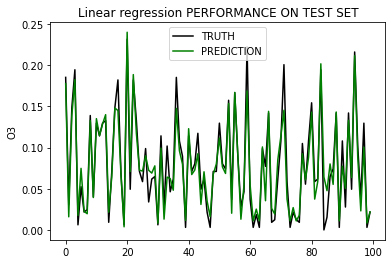

In [16]:
# IMPLEMENTING LINEAR REGRESSION WITHOUT REMOVING OUTLIERS
df=data_101['O3']
df=df.values
df=df.reshape(df.shape[0],1)
print(df.shape)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = min_max_scaler.fit_transform(df)
print(min(df),max(df))
list_=[]
for i in range (0,df_scaled.shape[0]):
  list_.append(df_scaled[i][0])
print(len(list_))
print(min(list_),max(list_))
window_size=5
y=[]
for i in range (0,len(list_)-window_size):
  x=list_[i:i+window_size]
  y.append(x)
print(len(y),y[0])
matrix= np.matrix(y)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(matrix[:,0:4],matrix[:,4],test_size=0.33, random_state=42)
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'linear_regressor.pkl')
from google.colab import files
files.download('linear_regressor.pkl')
print(prediction.shape,prediction[0:5])
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Linear regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [17]:
# BAYESIAN RIDGE REGRESSION
from sklearn import linear_model
from statsmodels.tsa.ar_model import AR
model = linear_model.BayesianRidge()

model.fit(X_train,y_train )
prediction=model.predict(X_test)
joblib.dump(model,'bayesian_regressor.pkl')
from google.colab import files
files.download('bayesian_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))

print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0006121536761407921
absolute mean error :  0.013508038429753672
0.8262986634406088


In [18]:
# IMLEMENTING  RANDOM FOREST ALGORITHM
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(max_depth=8, random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'randomforest_regressor.pkl')
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


mean squared eror :  0.0005119939667139807
absolute mean error :  0.012248020256969045
0.8547194278253284


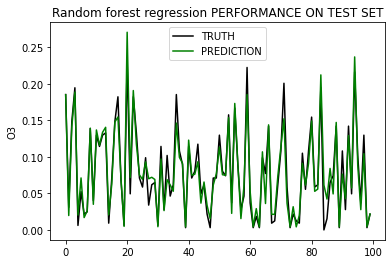

truth :  [[0.18518519]
 [0.0308642 ]
 [0.14814815]
 [0.19444444]
 [0.00617284]
 [0.05246914]
 [0.02160494]
 [0.02469136]
 [0.13888889]
 [0.04012346]]
prediction :  [0.18487118 0.01969998 0.1412479  0.18857365 0.0203274  0.07110399
 0.01689549 0.02604442 0.13897006 0.03502344]


In [19]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Random forest regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()
print('truth : ',y_test[0:10])
print('prediction : ',prediction[0:10])

In [20]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
joblib.dump(model,'ridge_regressor.pkl')
from google.colab import files
files.download('ridge_regressor.pkl')
print(mean_squared_error(y_test,prediction))
print(mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))


0.0006213611726698063
0.013863884263290934
0.8236859952238


In [21]:
# IMPLEMENTING SUPPORT VECTOR
from sklearn.svm import LinearSVR
model= LinearSVR()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('mean squared eror : ',mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print('absolute mean error : ', mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


mean squared eror :  0.0006920502653383409
absolute mean error :  0.012442428064603309
0.8036276498192532


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


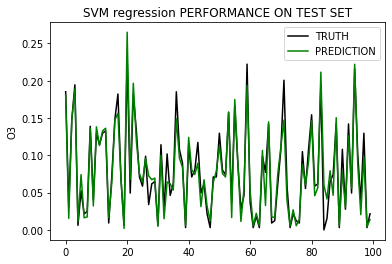

In [22]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('SVM regression PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [23]:
# IMPLEMENTING A NEURAL NETWORK
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X = sc.fit_transform(X)
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(64, input_dim=4, activation='relu'))
model.add(Dense(128, input_dim=4, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='relu'))


model.compile(optimizer = "adam", loss ='mse', 
          metrics =["accuracy"])
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
17320/17320 [==============================] - 2s 104us/step - loss: 5.5059e-04 - accuracy: 0.0015
Epoch 2/100
17320/17320 [==============================] - 2s 87us/step - loss: 4.0184e-04 - accuracy: 0.0015
Epoch 3/100
17320/17320 [==============================] - 1s 85us/step - loss: 3.9123e-04 - accuracy: 0.0015
Epoch 4/100
17320/17320 [==============================] - 1s 85us/step - loss: 3.8879e-04 - accuracy: 0.0015
Epoch 5/100
17320/17320 [==============================] - 1s 85us/step - loss: 3.8465e-04 - accuracy: 0.0015
Epoch 6/100
17320/17320 [==============================] - 1s 85us/step - loss: 3.7504e-04 - accuracy: 0.0015
Epoch 7/100
17320/17320 [==============================] - 1s 85us/step - loss: 3.6295e-04 - accuracy: 0.0015
Epoch 8/100
17320/17320 [==============================] - 1s 86us/step - loss: 3.6546e-04 - accuracy: 0.0015
Epoch 9/100
17320/17320 [==============================] - 2s 87us/step - loss: 3.6879e-04 - accuracy: 0.0015
Epoch 10/

dict_keys(['loss', 'accuracy'])


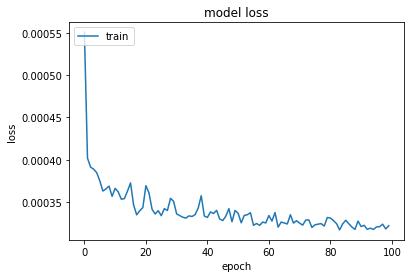

mean squared error :  0.0006083718120444835
mean absolute error :  0.012442428064603309
0.8036276498192532


In [24]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
y_pred = model.predict(X_test)
print('mean squared error : ',mean_squared_error(y_test,y_pred))
print('mean absolute error : ',mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))
#Converting predictions to label


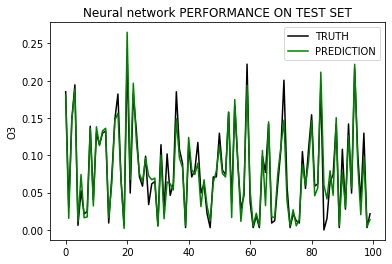

In [25]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('Neural network PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [26]:
print(X_train)
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
print(X_train.shape)

[[0.10493827 0.11419753 0.12037037 0.13888889]
 [0.02777778 0.04320988 0.05864198 0.05864198]
 [0.24074074 0.23148148 0.13888889 0.11111111]
 ...
 [0.10802469 0.11111111 0.01851852 0.15740741]
 [0.00308642 0.00308642 0.00308642 0.00308642]
 [0.16975309 0.15432099 0.13888889 0.10493827]]
(17320, 4)
(17320, 4, 1)


In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
#regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
#regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
17320/17320 [==============================] - 9s 527us/step - loss: 0.0015
Epoch 2/100
17320/17320 [==============================] - 7s 421us/step - loss: 5.6300e-04
Epoch 3/100
17320/17320 [==============================] - 7s 431us/step - loss: 4.7788e-04
Epoch 4/100
17320/17320 [==============================] - 7s 427us/step - loss: 4.5891e-04
Epoch 5/100
17320/17320 [==============================] - 7s 421us/step - loss: 4.5625e-04
Epoch 6/100
17320/17320 [==============================] - 7s 424us/step - loss: 4.4140e-04
Epoch 7/100
17320/17320 [==============================] - 7s 420us/step - loss: 4.2991e-04
Epoch 8/100
17320/17320 [==============================] - 8s 439us/step - loss: 4.1676e-04
Epoch 9/100
17320/17320 [==============================] - 8s 439us/step - loss: 4.1216e-04
Epoch 10/100
17320/17320 [==============================] - 8s 457us/step - loss: 4.0951e-04
Epoch 11/100
17320/17320 [==============================] - 8s 456us/step - loss: 4

dict_keys(['loss'])


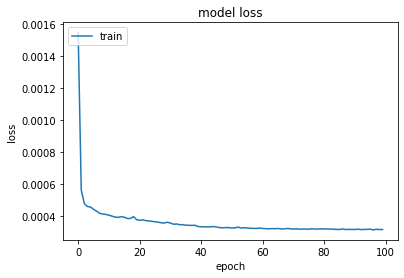

mean square error : 0.0005127623273240737
mean absolute error :  0.01255603427149001
0.854501402074386


In [28]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)
prediction = regressor.predict(X_test)
print("mean square error :" ,mean_squared_error(y_test,prediction))
from sklearn.metrics import mean_absolute_error
print("mean absolute error : ",mean_absolute_error(y_test,prediction))
print(r2_score(y_test,prediction))

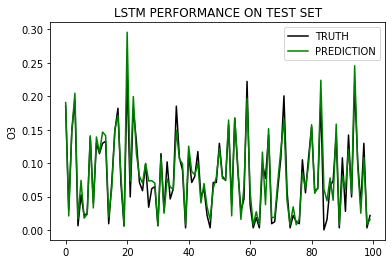

In [29]:
plt.plot(y_test[0:100], color = 'black', label = 'TRUTH')
plt.plot(prediction[0:100], color = 'green', label = 'PREDICTION')
plt.title('LSTM PERFORMANCE ON TEST SET')
plt.ylabel('O3')
plt.legend()
plt.show()

In [0]:
#joblib.dump(regressor,'lstm_regressor.pkl')
#from google.colab import files
#files.download('lstm_regressor.pkl')